# Learning From Data - Homework 1
## Ognen Nastov

<img src="hw1_images/hw1p1.png">

**Answer**: [d].

---

<img src="hw1_images/hw1p2.png">

**Answer**: [a].

---

<img src="hw1_images/hw1p3.png">

**Answer**:

Conditional probability:  $$P(A|B) = P(A \cap B) P(B)$$

Multiplication rule:  $$P(A \cap B) = P(A|B) P(B)$$

Note: multiplication rule is a rewrite of the conditional probability formula.

Law of total probability:  $$P(B) = P(B|X) P(X) + P(B|Y) P(Y)$$    
where $X$ and $Y$ are disjoint, i.e. 

$$P(X \cup Y) = P(X) + P(Y)$$
    
Bayes theorem:  $$P(A|B) P(B) = P(B|A) P(A)$$

$A$ = bag with 2 black balls is being used  
$B$ = first ball picked is black  
$C$ = bag with 1 black and 1 white balls is being used  

$A|B$ = bag with 2 black balls is being used given first ball picked is black = second ball is black  
$B|A$ = first ball picked is black given bag with 2 black balls is being used  

$$P(A) = P(C) = \frac{1}{2}$$

$$P(B|A) = 1$$

A and C are disjoint:  $$P(B) = P(B|A) P(A) + P(B|C) P(C)$$

$$P(B|C) = \frac{1}{2}$$

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)} = \frac{1 \cdot \frac{1}{2}}{1 \cdot \frac{1}{2} + \frac{1}{2} \cdot \frac{1}{2}} = \frac{2}{3}$$

Answer is [d].

---

<img src="hw1_images/hw1p4.png">

**Answer**: 

$G$ = green marble drawn  
$$P(G) = 1 - μ = 0.45$$

Each drawn marble is an independent event, therefore probabilities multiply.

$$P(A \cap B) = P(A) P(B)$$

$P_{10}$ = sample is all green i.e. no red in sample

$$P_{10} = (1 - μ)^{10} = 0.45^{10} = 3.405 \times 10^{-4}$$

Answer is [b].

---

<img src="hw1_images/hw1p5.png">

**Answer**:

$R$ = there is red in all 1000 samples  
$X$ = one or more samples are all green i.e one or more samples have no red

$$P(R) + P(X) = 1$$

$P_{10}$ = probability a sample is all green i.e. no red in sample  
$1 - P_{10}$ = probability a sample has red in it

$$P(R) = (1 - P_{10})^{1000} = (1 - 3.405\times 10^{-4})^{1000} = 0.711$$

$$P(X) = 1 - P(R) = 1 - 0.711 = 0.289$$

Answer is [c].

---

<img src="hw1_images/hw1p6.png">

**Answer**:

|$x_n$|f1|f2|$\cdots$|f8|
|-|-|-|-|-|
|101|0|0||1|
|110|0|0||1|
|111|0|1||1|

|$x_n$|$g_a$|$g_b$|$g_c$|$g_d$|
|-|-|-|-|-|
|101|1|0|0|1|
|110|1|0|0|1|
|111|1|0|1|0|

$$s_a = 1 \cdot 3 + 3 \cdot 2 + 3 \cdot 1 + 1 \cdot 0 = 12$$
$$s_b = 1 \cdot 3 + 3 \cdot 2 + 3 \cdot 1 + 1 \cdot 0 = 12$$
$$s_c = 1 \cdot 3 + 3 \cdot 2 + 3 \cdot 1 + 1 \cdot 0 = 12$$
$$s_d = 1 \cdot 3 + 3 \cdot 2 + 3 \cdot 1 + 1 \cdot 0 = 12$$

All return the same score. Answer is [e].

The message of this problem is that regardless of whether you are doing something intelligent or otherwise, there is nothing that can be learned outside the training sample in a deterministic sense. To make the message crisp, the problem considers some 'crazy' training schemes in the mix.

Outside the training set, no "learning" is possible if we take a deterministic view.

---

<img src="hw1_images/hw1p7.png">

**Answer:**

Create data set and target function:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# dimension of input space d = 2
# number of data points = N
# data is shape (N, d+1) i.e. (N, 3)
def make_data_set(N):
    data = np.zeros([N,3])
    data[:,0] = np.ones([N,])
    data[:,1] = np.random.uniform(-1,1,N)
    data[:,2] = np.random.uniform(-1,1,N)
    return (data)

# the line defines the target function
# line is shape (2,)
def make_line():    
    x_1,y_1 = np.random.uniform(-1,1,2)
    x_2,y_2 = np.random.uniform(-1,1,2)
    slope = (y_1 - y_2) / (x_1 - x_2)
    b = y_2 - slope * x_2
    return (slope, b)

# y is shape (N,)    
def classify_input(line, data):
    slope, b = line
    y = np.sign(data[:,1]*slope + b - data[:,2])
    return (y)

PLA (Perceptron Learning Algorithm), and classification error estimate:

In [2]:
def pla(data, y, maxits):  
    i = 0
    w = np.zeros(data.shape[1])
    while (i < maxits):
        y_c = np.sign(np.dot(data, w))
        if np.count_nonzero(y_c != y) == 0:
            break
        else:  # update perceptron with a misclassified point
            misclassified_indices = (y_c != y).nonzero()[0]
            ix = np.random.choice(misclassified_indices)
            w = w + data[ix,:]*y[ix]
        i += 1
    return (w, i)

# N_test should be sufficiently large (e.g. 1e6)
def classification_error(w, N_test, line):
    data = make_data_set(N_test)
    y = classify_input(line, data)
    y_c = np.sign(np.dot(data, w)) 
    error = np.count_nonzero(y_c != y) / N_test
    return (error)

Plot the data, target function (black), and final hypothesis (green).

In [3]:
# plot data, target fn, and final hypothesis
def plot_data(data, line, y, w):
    fig,ax = plt.subplots()
    plt.axis([-1,1,-1,1])
    plt.grid()
    slope,b = line
    for i in range(data.shape[0]):
        if y[i] == 1: 
            plt.plot(data[i,1], data[i,2], 'ro')
        else:
            plt.plot(data[i,1], data[i,2], 'bo')

    plt.plot([-1,1], [-slope+b, slope+b], 'k')
    plt.plot([-1,1], [(w[1] - w[0])/w[2], (-w[1] - w[0])/w[2]], 'g')
    ax.set_aspect('equal','box')
    return

Test the ``pla()`` function:

In [4]:
data = make_data_set(10)
line = make_line()
y = classify_input(line,data)
w,i = pla(data, y, 1000)

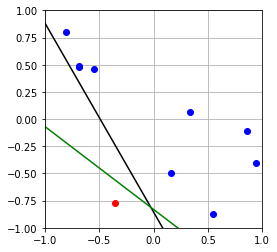

In [5]:
plot_data(data, line , y, w)

Run experiment:

In [6]:
def problems_7_to_10(N, trials=1000, maxits=1000, N_test=100000):
    iters = np.zeros(trials)
    errors = np.zeros(trials)
    trial = 1
    while (trial < trials):
        line = make_line()
        data = make_data_set(N)
        y = classify_input(line, data)
        w, i = pla(data, y, maxits)
        error = classification_error(w, N_test, line)
        iters[trial] = i
        errors[trial] = error
        trial += 1
    iter_mean = np.mean(iters)
    iter_std = np.std(iters)
    iter_median = np.median(iters)
    error_mean = np.mean(errors)
    error_std = np.std(errors)
    error_median = np.median(errors)
    print(f"iter: mean={iter_mean:.2f}, std={iter_std:.2f}, \
median={iter_median:.2f}")
    print(f"error: mean={error_mean:.2f}, std={error_std:.2f}, \
median={error_median:.2f}")
    return

In [7]:
problems_7_to_10(10)

iter: mean=10.15, std=18.66, median=6.00
error: mean=0.11, std=0.07, median=0.09


Answer is [b].

---

<img src="hw1_images/hw1p8a.png">
<img src="hw1_images/hw1p8b.png">

**Answer:**

Answer is [c].

---

<img src="hw1_images/hw1p9.png">

**Answer:**

In [8]:
problems_7_to_10(100)

iter: mean=105.24, std=148.71, median=60.00
error: mean=0.01, std=0.01, median=0.01


Answer is [b].

---

<img src="hw1_images/hw1p10.png">

**Answer:**

Answer is [b].

---